# Engenius '20 - EDA

## Summary

The Main goal is to predict the quantities sold of a set of products within a 4 months time frame.

# Table Of Contents

# Exploratory Data Analysis

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

product_sheets = ['PRODUCT_A', 'PRODUCT_B', 'PRODUCT_C', 'PRODUCT_V', 'PRODUCT_X']
data = {}

for s in product_sheets:
    data[s] = pd.read_excel('datasets/Data2017-2019.xls', s)
    


In [69]:
# merge data frames for all 5 products vertically
df_all5 = data[product_sheets[0]]
for i,s in enumerate(product_sheets):
    if i != 0:
        df_all5 = df_all5.append(data[s], ignore_index=True)


In [70]:
df_all5.shape

(58032, 5)

In [71]:
df_all5.Product.value_counts()

PRODUCT_C    17980
PRODUCT_B    17962
PRODUCT_A    17371
PRODUCT_X     2920
PRODUCT_V     1799
Name: Product, dtype: int64

### Null Valued Features
- ratio of null values
  No null values as seen below

In [72]:
(df_all5.isnull().sum() / df_all5.shape[0])

Year        0.0
Period      0.0
Product     0.0
Province    0.0
Quantity    0.0
dtype: float64

* ratio of transactions (sales) with negative quantities
  probably product return

In [73]:
(df_all5[df_all5.Quantity < 0].shape[0] / df_all5.shape[0])

0.0016197959746346844

In [74]:
data_sorted = df_all5.sort_values(by=['Period', 'Province', 'Product']).reset_index(drop=True)
data_sorted.head(5)

,Year,Period,Product,Province,Quantity
0,2017,201701,PRODUCT_A,ADANA,11
1,2017,201701,PRODUCT_A,ADANA,25
2,2017,201701,PRODUCT_A,ADANA,54
3,2017,201701,PRODUCT_A,ADANA,17
4,2017,201701,PRODUCT_A,ADANA,30


In [75]:
data_sorted = df_all5.sort_values(by=['Period', 'Province', 'Product']).reset_index(drop=True)
data_sorted.head(5)

,Year,Period,Product,Province,Quantity
0,2017,201701,PRODUCT_A,ADANA,11
1,2017,201701,PRODUCT_A,ADANA,25
2,2017,201701,PRODUCT_A,ADANA,54
3,2017,201701,PRODUCT_A,ADANA,17
4,2017,201701,PRODUCT_A,ADANA,30


In [76]:
# removes ıstanbul typo
data_sorted['Province'] = data_sorted.Province.apply(lambda x: 'İSTANBUL' if x == 'ISTANBUL' else x)

In [78]:
#aggragate products sold
data_aggregated = data_sorted.groupby(['Period', 'Province', 'Product'])['Quantity'].sum().reset_index()
data_aggregated.head(10)

,Period,Province,Product,Quantity
0,201701,ADANA,PRODUCT_A,346
1,201701,ADANA,PRODUCT_B,4838
2,201701,ADANA,PRODUCT_C,1004
3,201701,ADANA,PRODUCT_V,20
4,201701,ADANA,PRODUCT_X,910
5,201701,ADIYAMAN,PRODUCT_A,36
6,201701,ADIYAMAN,PRODUCT_B,45
7,201701,ADIYAMAN,PRODUCT_C,206
8,201701,ADIYAMAN,PRODUCT_X,44
9,201701,AFYON,PRODUCT_A,66


In [79]:
data_aggregated.shape

(13343, 4)

In [80]:
data_aggregated.to_csv('datasets/data_aggregated.csv')

### Distribution of Products Sold

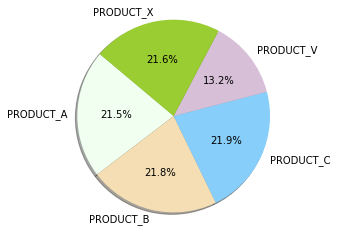

PRODUCT_C    2916
PRODUCT_B    2912
PRODUCT_X    2884
PRODUCT_A    2868
PRODUCT_V    1763
Name: Product, dtype: int64

In [83]:
labels = product_sheets
data_aggregated.Product.value_counts().sort_index().tolist()
sizes = data_aggregated.Product.value_counts().sort_index().tolist()
colors = ['honeydew', 'wheat', 'lightskyblue', 'thistle', 'yellowgreen']
#explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

data_aggregated.Product.value_counts()